<a href="https://colab.research.google.com/github/NilaKari/wk2_AI_Project/blob/main/Week2_AI_SDG_Project_Leonila_Muriuki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/6054c259-8ebb-4990-a607-ecf5ebfcba0b_Data.csv')
df.head()


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T1.ZS,Afghanistan,AFG,99.9583192746398,99.9667092095625,99.8345704823674,99.6378371534564,99.6629497098259,..,..,..,..,..,..,..
1,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T1.ZS,Albania,ALB,0.423869947033861,0.035521650806436,0,0,0,..,..,..,..,..,..,..
2,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T1.ZS,Algeria,DZA,69.6692545114553,63.3434686615888,83.2441556371922,82.5797084939636,84.4120206699264,..,..,..,..,..,..,..
3,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T1.ZS,American Samoa,ASM,0,0,0,0,0,..,..,..,..,..,..,..
4,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T1.ZS,Andorra,AND,0,0,0,0,0,..,..,..,..,..,..,..


In [ ]:
# Basic Data Tools
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df.head()   # Shows first 5 rows
df.info()   # Shows column names and data types
df.describe()  # Gives numeric summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
count,268,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266
unique,3,1,266,266,93,86,84,75,75,1,1,1,1,1,1,1
top,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T1.ZS,World,WLD,0,0,0,0,0,..,..,..,..,..,..,..
freq,266,266,1,1,85,92,95,104,103,266,266,266,266,266,266,266


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


R² Score: nan
Mean Squared Error: 0.044521433080389375


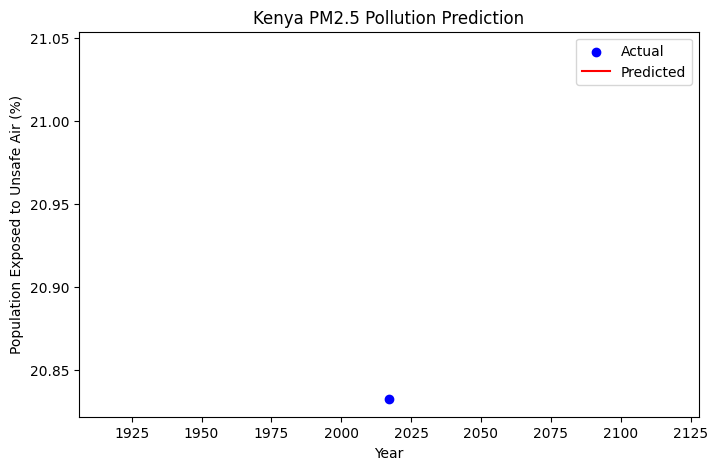

Predicted PM2.5 exposure in 2025: 22.77%
Predicted PM2.5 exposure in 2026: 22.98%
Predicted PM2.5 exposure in 2027: 23.20%
Predicted PM2.5 exposure in 2028: 23.42%
Predicted PM2.5 exposure in 2029: 23.63%
Predicted PM2.5 exposure in 2030: 23.85%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Filter for Kenya
kenya = data[data["Country Name"] == "Kenya"]

# Select only year columns
year_columns = [col for col in kenya.columns if "[YR" in col]
years = [int(col.split("[YR")[1].split("]")[0]) for col in year_columns]
values = kenya.iloc[0][year_columns].replace("..", np.nan).astype(float).values

# Remove missing entries
mask = ~np.isnan(values)
years = np.array(years)[mask].reshape(-1, 1)
values = values[mask]

split_index = int(0.8 * len(years))
X_train, X_test = years[:split_index], years[split_index:]
y_train, y_test = values[:split_index], values[split_index:]

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', label="Predicted")
plt.title("Kenya PM2.5 Pollution Prediction")
plt.xlabel("Year")
plt.ylabel("Population Exposed to Unsafe Air (%)")
plt.legend()
plt.show()

future_years = np.array([[2025], [2026], [2027], [2028], [2029], [2030]])
future_predictions = model.predict(future_years)

for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"Predicted PM2.5 exposure in {year}: {pred:.2f}%")


